In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import numpy as np
import datetime
import os
import csv
import seawater.eos80 as sw
import scipy.io
import cmocean

from matplotlib import cm
from numpy import linspace

import pandas as pd
from scipy.interpolate import griddata

In [3]:
# Read the data from the CSV file
data = pd.read_csv('Transect data\IN2021_transect_65E.csv')

In [4]:
# Extract the required columns
temp = data['temperature']
cons_temp = data['conservative temperature']
salt = data['salinity']
abs_salt = data['absolute salinity']
oxygen = data['oxygen']
lat = data['latitude']
lon = data['longitude']
depth = data['depth']
neu_dens = data['neutral density']
time = data['time']

print(time)

0        53
1        53
2        53
3        53
4        53
         ..
16111    55
16112    55
16113    55
16114    55
16115    55
Name: time, Length: 16116, dtype: int64


In [15]:
### to get the data in the right format, first need to get them in the format:
# pressure | temperature | salinity | ocygen | latitude | longitude

#then run matlab code organising_IN2021_transect.m file to calculate cons temp, abs salt etc 

## then open the files & manually add in a time column where Jan 1 = 1 & Dec 30 = 365

In [41]:
import os
import pandas as pd

# #IN2021 65E transect
# folder_path = 'Transect data\IN2021_transect_65E_files'
# excluded_folder = 'Transect data\IN2021_transect_65E_files\rest of transect to be edited'

# #IN2021 70E transect
# folder_path = 'Transect data\IN2021_transect_70E_files'
# excluded_folder = 'Transect data\IN2021_transect_70E_files\rest of transect to be edited'

#AA1992 68E transect
folder_path = 'Transect data\AA1992_transect_68E_files'
excluded_folder = 'Transect data\AA1992_transect_68E_files\rest of transect to be edited'

# Initialize lists to store the extracted data
all_temp = []
all_cons_temp = []
all_salt = []
all_abs_salt = []
all_oxygen = []
all_lat = []
all_lon = []
all_depth = []
all_neu_dens = []
all_time = []


# Get a list of all CSV files in the folder
file_list = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Iterate through each file
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    
    # Check if the file is within the excluded folder
    if excluded_folder in file_path:
        continue  # Skip this file and continue to the next one
    
    # Read the CSV file into a pandas DataFrame
    data = pd.read_csv(file_path)
    
    # Extract the required columns
    temp = data['temperature']
    cons_temp = data['conservative temperature']
    salt = data['salinity']
    abs_salt = data['absolute salinity']
    oxygen = data['oxygen']
    lat = data['latitude']
    lon = data['longitude']
    depth = data['depth']
    neu_dens = data['neutral density']
    time = data['time']


    # Accumulate the extracted data
    all_temp.extend(temp)
    all_cons_temp.extend(cons_temp)
    all_salt.extend(salt)
    all_abs_salt.extend(abs_salt)
    all_oxygen.extend(oxygen)
    all_lat.extend(lat)
    all_lon.extend(lon)
    all_depth.extend(depth)
    all_neu_dens.extend(neu_dens)
    all_time.extend(time)

len(all_temp)
# print(time)



# Convert all_lat and all_depth to NumPy arrays
all_temp = np.array(all_temp)
all_cons_temp = np.array(all_cons_temp)
all_salt = np.array(all_salt)
all_abs_salt = np.array(all_abs_salt)
all_oxygen = np.array(all_oxygen)
all_lat = np.array(all_lat)
all_lon = np.array(all_lon)
all_depth = np.array(all_depth)
all_neu_dens = np.array(all_neu_dens)
all_time = np.array(all_time)

print(all_lat)
print(all_cons_temp)
len(all_lat)
len(all_cons_temp)

[-67.77583 -67.77583 -67.77583 ... -63.0005  -63.0005  -63.0005 ]
[-1.03098226 -1.03204232 -1.03510378 ...         nan         nan
         nan]


28912

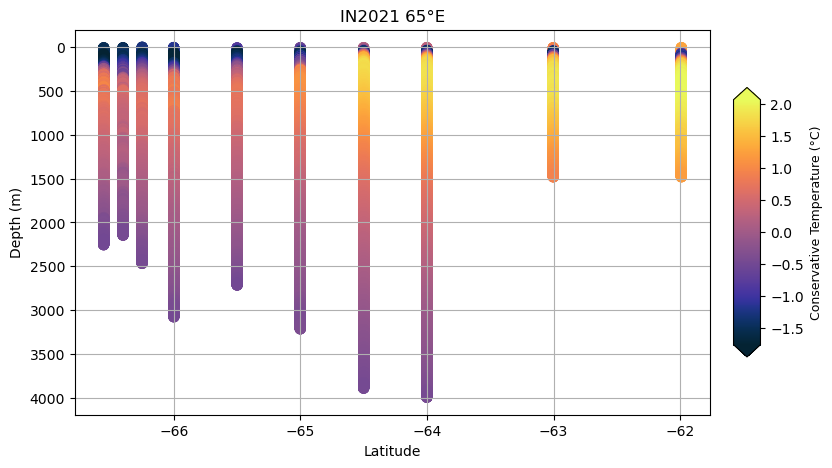

In [9]:
plt.figure(figsize=(10, 5))

# Create the cross-sectional transect plot
scatter = plt.scatter(all_lat, all_depth, c=all_cons_temp, cmap='cmo.thermal', s=50)

# Set the plot parameters
cbar = plt.colorbar(scatter, orientation='vertical', shrink=0.7, pad=0.03, aspect=10, extend='both')
cbar.set_label('Conservative Temperature (°C)', fontsize=9)

plt.xlabel('Latitude')
plt.ylabel('Depth (m)')
plt.title('IN2021 65°E')

# Reverse the y-axis to have 0m at the top
plt.gca().invert_yaxis()

# # Set the tick marks for latitude
#lat_ticks = np.arange(np.floor(np.min(lat)), np.ceil(np.max(lat)) + 0.1, 0.1)
#plt.xticks(lat_ticks, rotation='vertical')

plt.grid()


# Show the plot
plt.show()

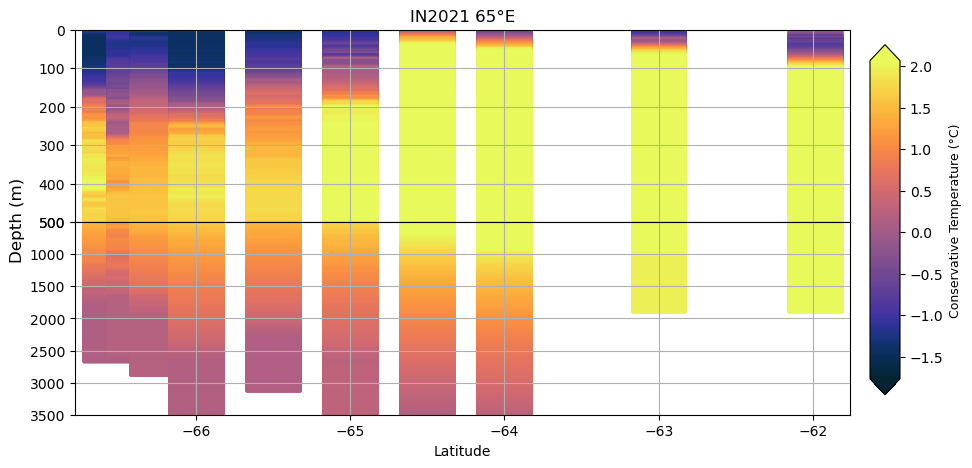

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))

# First subplot with y-axis range 0-500m
scatter1 = ax1.scatter(all_lat, all_depth, c=all_cons_temp, cmap='cmo.thermal', s=1500, marker = ',', vmin=-2, vmax=1)
ax1.set_ylim(0, 500)
ax1.set_title('IN2021 65°E')
ax1.invert_yaxis()
ax1.set_xticklabels([])
ax1.grid()

# Second subplot with y-axis range 500-4000m
scatter2 = ax2.scatter(all_lat, all_depth, c=all_cons_temp, cmap='cmo.thermal', s=1500, marker = ',', vmin=-2, vmax=1)
ax2.set_ylim(500, 3500)
ax2.set_xlabel('Latitude')
ax2.invert_yaxis()
ax2.grid()

# Create a single colorbar for both subplots
sm = cm.ScalarMappable(cmap='cmo.thermal')
sm.set_array(all_cons_temp)

# Position the colorbar on the right side
cax = fig.add_axes([0.92, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cax, extend='both')
cbar.set_label('Conservative Temperature (°C)', fontsize=9)

# Add y-axis title between the subplots
fig.text(0.06, 0.5, 'Depth (m)', va='center', rotation='vertical', fontsize=12)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0)

# Show the plot
plt.show()

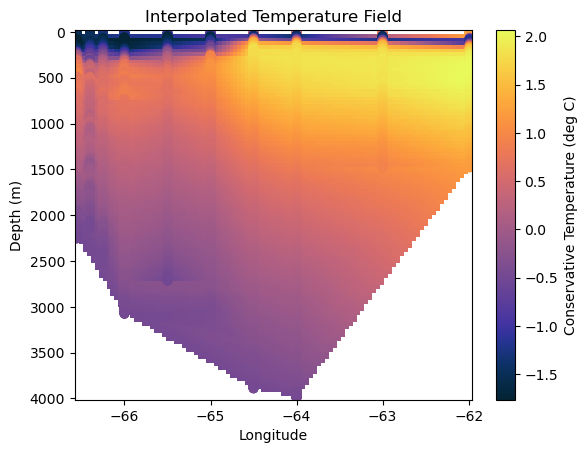

In [12]:
# Prepare the grid of X, Z values for interpolation
X, Z = np.meshgrid(all_lat, all_depth)

# Define the grid points for interpolation
grid_lon = np.linspace(all_lat.min(), all_lat.max(), 100)
grid_depth = np.linspace(all_depth.min(), all_depth.max(), 100)
grid_X, grid_Z = np.meshgrid(grid_lon, grid_depth)

# Perform the interpolation using griddata
grid_temp = griddata((all_lat, all_depth), all_cons_temp, (grid_X, grid_Z), method='linear')

# Plot the interpolated field using pcolormesh
plt.pcolormesh(grid_X, grid_Z, grid_temp, cmap='cmo.thermal')

# Overlay scatter/plot values
plt.scatter(all_lat, all_depth, c=all_cons_temp, cmap='cmo.thermal')

# Add colorbar
plt.colorbar(label='Conservative Temperature (deg C)')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Depth (m)')
plt.title('Interpolated Temperature Field')

# Reverse the y-axis to have 0m at the top
plt.gca().invert_yaxis()

# Show the plot
plt.show()

In [42]:
#I got memory issues coz the data is too big, so try changing from float64 to float32
# Convert the arrays to float32
all_lat_float32 = all_lat.astype(np.float32)
all_depth_float32 = all_depth.astype(np.float32)

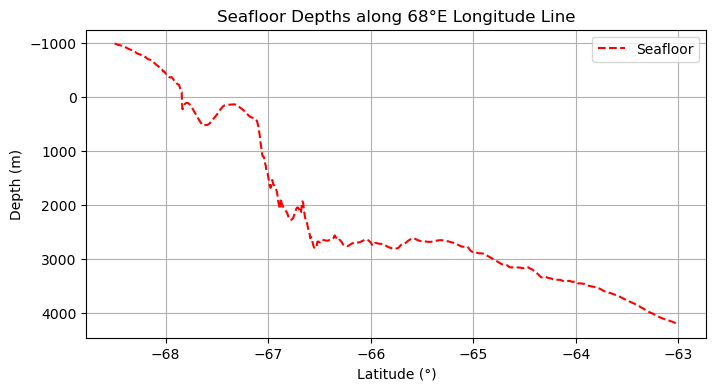

In [43]:
import xarray as xr

# Open the NetCDF file with xarray
gebco = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')

# Extract the bathymetry data for the longitude line of 68°E
longitude_line = 68.0  # Specify the desired longitude line
bathymetry_along_68E = gebco.sel(lon=longitude_line, method='nearest')


# Extract latitude and depth values
latitude_values = bathymetry_along_68E['lat'].values
depth_values = -bathymetry_along_68E['elevation'].values  # Negative values because bathymetry is negative


# Now, you have the latitude and seafloor depth values along the 68°E longitude line.

# Plot the seafloor depths along the 68°E longitude line
plt.figure(figsize=(8, 4))
plt.plot(latitude_values, depth_values, color='red', linestyle='--', label='Seafloor')
plt.xlabel('Latitude (°)')
plt.ylabel('Depth (m)')
plt.title('Seafloor Depths along 68°E Longitude Line')
plt.legend()
plt.grid()
# Invert the y-axis
plt.gca().invert_yaxis()
plt.show()


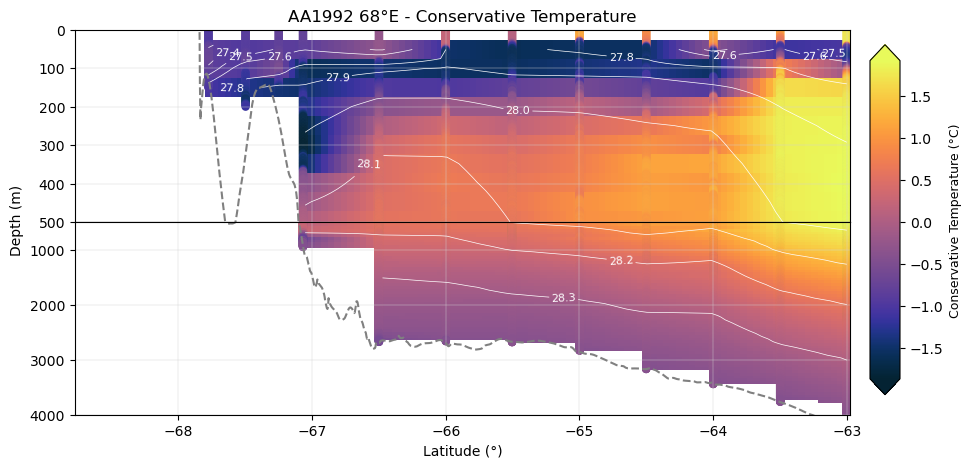

In [46]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))

# Prepare the grid of X, Z values for interpolation
X, Z = np.meshgrid(all_lat_float32, all_depth_float32)

# Define the grid points for interpolation
grid_lon = np.linspace(all_lat.min(), all_lat.max(), 100)
grid_depth = np.linspace(all_depth.min(), all_depth.max(), 100)
grid_X, grid_Z = np.meshgrid(grid_lon, grid_depth)

# Perform the interpolation using griddata
grid_cons_temp = griddata((all_lat, all_depth), all_cons_temp, (grid_X, grid_Z), method='linear')
grid_neu_dens = griddata((all_lat, all_depth), all_neu_dens, (grid_X, grid_Z), method='linear')
grid_abs_salt = griddata((all_lat, all_depth), all_abs_salt, (grid_X, grid_Z), method='linear')


# Open the NetCDF file with xarray
gebco = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')
elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)



# First subplot with y-axis range 0-500m
mesh1 = ax1.pcolormesh(grid_X, grid_Z, grid_cons_temp, cmap='cmo.thermal')
#cont1 = ax1.contour(grid_X, grid_Z, grid_neu_dens, levels=10, colors='w', linewidths=0.5)
cont1 = ax1.contour(grid_X, grid_Z, grid_neu_dens, levels=[27.2, 27.3, 27.4, 27.5, 27.6, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3], colors='w', linewidths=0.5)
# Overlay scatter/plot values
scat1 = ax1.scatter(all_lat, all_depth, c=all_cons_temp, cmap='cmo.thermal', edgecolor = 'lightgray', linewidths=0.01)
ax1.clabel(cont1, inline=True, fontsize=8, fmt='%1.1f')
ax1.set_ylim(0, 500)
# ax1.set_title('IN2021 65°E - Conservative Temperature')
# ax1.set_title('IN2021 70°E - Conservative Temperature')
ax1.set_title('AA1992 68°E - Conservative Temperature')
ax1.invert_yaxis()
ax1.set_xticklabels([])
ax1.grid(linewidth=0.3, color='lightgray')
# Plot a line for seafloor depths on both subplots
ax1.plot(latitude_values, depth_values, color='gray', linestyle='--', label='Seafloor')


# Second subplot with y-axis range 500-3500m
mesh2 = ax2.pcolormesh(grid_X, grid_Z, grid_cons_temp, cmap='cmo.thermal')
#cont2 = ax2.contour(grid_X, grid_Z, grid_neu_dens, levels=10, colors='w', linewidths=0.5)
cont2 = ax2.contour(grid_X, grid_Z, grid_neu_dens, levels=[27.2, 27.3, 27.4, 27.5, 27.6, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3], colors='w', linewidths=0.5)
# Overlay scatter/plot values
scat2 = ax2.scatter(all_lat, all_depth, c=all_cons_temp, cmap='cmo.thermal', edgecolor = 'lightgray', linewidths=0.001)
ax2.clabel(cont2, inline=True, fontsize=8, fmt='%1.1f')
ax2.set_ylim(500, 4000)
ax2.invert_yaxis()
ax2.set_xlabel('Latitude (°)', fontsize=10)
ax2.grid(linewidth=0.3, color='lightgray')
ax2.plot(latitude_values, depth_values, color='gray', linestyle='--', label='Seafloor')


# Create a single colorbar for both subplots
sm = cm.ScalarMappable(cmap='cmo.thermal')
sm.set_array(grid_cons_temp)

# sm = cm.ScalarMappable(cmap='cmo.haline')
# sm.set_array(grid_abs_salt)




# Position the colorbar on the right side
cax = fig.add_axes([0.92, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cax, extend='both')
cbar.set_label('Conservative Temperature (°C)', fontsize=9)
#cbar.set_label('Absolute Salinity (g/kg)', fontsize=9)

# Add y-axis title between the subplots
fig.text(0.06, 0.5, 'Depth (m)', va='center', rotation='vertical', fontsize=10)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0)

# Show the plot
plt.show()

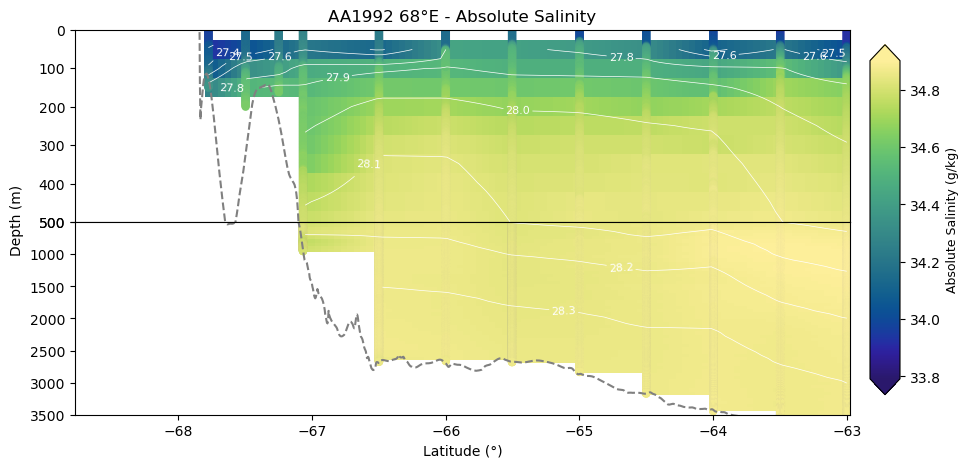

In [47]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))

# Prepare the grid of X, Z values for interpolation
X, Z = np.meshgrid(all_lat_float32, all_depth_float32)

# Define the grid points for interpolation
grid_lon = np.linspace(all_lat.min(), all_lat.max(), 100)
grid_depth = np.linspace(all_depth.min(), all_depth.max(), 100)
grid_X, grid_Z = np.meshgrid(grid_lon, grid_depth)

# Perform the interpolation using griddata
grid_cons_temp = griddata((all_lat, all_depth), all_cons_temp, (grid_X, grid_Z), method='linear')
grid_neu_dens = griddata((all_lat, all_depth), all_neu_dens, (grid_X, grid_Z), method='linear')
grid_abs_salt = griddata((all_lat, all_depth), all_abs_salt, (grid_X, grid_Z), method='linear')




# First subplot with y-axis range 0-500m
mesh1 = ax1.pcolormesh(grid_X, grid_Z, grid_abs_salt, cmap='cmo.haline')
# cont1 = ax1.contour(grid_X, grid_Z, grid_neu_dens, levels=10, colors='w', linewidths=0.5)
cont1 = ax1.contour(grid_X, grid_Z, grid_neu_dens, levels=[27.2, 27.3, 27.4, 27.5, 27.6, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3], colors='w', linewidths=0.5)
# Overlay scatter/plot values
scat1 = ax1.scatter(all_lat, all_depth, c=all_abs_salt, cmap='cmo.haline', edgecolor = 'lightgray', linewidths=0.01)
ax1.clabel(cont1, inline=True, fontsize=8, fmt='%1.1f')
ax1.set_ylim(0, 500)
#ax1.set_title('IN2021 65°E - Absolute Salinity')
# ax1.set_title('IN2021 70°E - Conservative Temperature')
ax1.set_title('AA1992 68°E - Absolute Salinity')
ax1.invert_yaxis()
ax1.set_xticklabels([])
ax1.plot(latitude_values, depth_values, color='gray', linestyle='--', label='Seafloor')
# ax1.grid()

# Second subplot with y-axis range 500-3500m
mesh2 = ax2.pcolormesh(grid_X, grid_Z, grid_abs_salt, cmap='cmo.haline')
# cont2 = ax2.contour(grid_X, grid_Z, grid_neu_dens, levels=10, colors='w', linewidths=0.5)
cont2 = ax2.contour(grid_X, grid_Z, grid_neu_dens, levels=[27.2, 27.3, 27.4, 27.5, 27.6, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3], colors='w', linewidths=0.5)
# Overlay scatter/plot values
scat2 = ax2.scatter(all_lat, all_depth, c=all_abs_salt, cmap='cmo.haline', edgecolor = 'lightgray', linewidths=0.001)
ax2.clabel(cont2, inline=True, fontsize=8, fmt='%1.1f')
ax2.set_ylim(500, 3500)
ax2.invert_yaxis()
ax2.set_xlabel('Latitude (°)', fontsize=10)
ax2.plot(latitude_values, depth_values, color='gray', linestyle='--', label='Seafloor')
# ax2.grid()


# Create a single colorbar for both subplots
# sm = cm.ScalarMappable(cmap='cmo.thermal')
# sm.set_array(grid_cons_temp)

sm = cm.ScalarMappable(cmap='cmo.haline')
sm.set_array(grid_abs_salt)




# Position the colorbar on the right side
cax = fig.add_axes([0.92, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cax, extend='both')
# cbar.set_label('Conservative Temperature (°C)', fontsize=9)
cbar.set_label('Absolute Salinity (g/kg)', fontsize=9)

# Add y-axis title between the subplots
fig.text(0.06, 0.5, 'Depth (m)', va='center', rotation='vertical', fontsize=10)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0)

# Show the plot
plt.show()

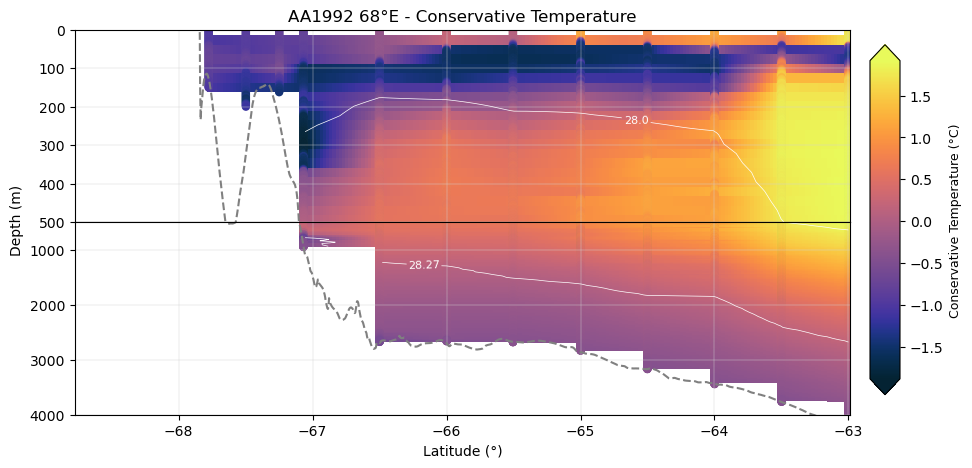

In [44]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.interpolate import griddata


# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))

# Prepare the grid of X, Z values for interpolation
X, Z = np.meshgrid(all_lat_float32, all_depth_float32)

# Define the grid points for interpolation
grid_lon = np.linspace(all_lat.min(), all_lat.max(), 200)
grid_depth = np.linspace(all_depth.min(), all_depth.max(), 200)
grid_X, grid_Z = np.meshgrid(grid_lon, grid_depth)

# Perform the interpolation using griddata
grid_cons_temp = griddata((all_lat, all_depth), all_cons_temp, (grid_X, grid_Z), method='linear')
grid_neu_dens = griddata((all_lat, all_depth), all_neu_dens, (grid_X, grid_Z), method='linear')
grid_abs_salt = griddata((all_lat, all_depth), all_abs_salt, (grid_X, grid_Z), method='linear')


# Open the NetCDF file with xarray
gebco = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')
elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)



# First subplot with y-axis range 0-500m
mesh1 = ax1.pcolormesh(grid_X, grid_Z, grid_cons_temp, cmap='cmo.thermal')
#cont1 = ax1.contour(grid_X, grid_Z, grid_neu_dens, levels=10, colors='w', linewidths=0.5)
#cont1 = ax1.contour(grid_X, grid_Z, grid_neu_dens, levels=[27.2, 27.3, 27.4, 27.5, 27.6, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3], colors='w', linewidths=0.5)
cont1 = ax1.contour(grid_X, grid_Z, grid_neu_dens, levels=[28, 28.27], colors='w', linewidths=0.5)
# Overlay scatter/plot values
scat1 = ax1.scatter(all_lat, all_depth, c=all_cons_temp, cmap='cmo.thermal', edgecolor = 'lightgray', linewidths=0.01)
ax1.clabel(cont1, inline=True, fontsize=8, fmt='%1.1f')
ax1.set_ylim(0, 500)
# ax1.set_title('IN2021 65°E - Conservative Temperature')
# ax1.set_title('IN2021 70°E - Conservative Temperature')
ax1.set_title('AA1992 68°E - Conservative Temperature')
ax1.invert_yaxis()
ax1.set_xticklabels([])
ax1.grid(linewidth=0.3, color='lightgray')
# Plot a line for seafloor depths on both subplots
ax1.plot(latitude_values, depth_values, color='gray', linestyle='--', label='Seafloor')


# Second subplot with y-axis range 500-3500m
mesh2 = ax2.pcolormesh(grid_X, grid_Z, grid_cons_temp, cmap='cmo.thermal')
#cont2 = ax2.contour(grid_X, grid_Z, grid_neu_dens, levels=10, colors='w', linewidths=0.5)
#cont2 = ax2.contour(grid_X, grid_Z, grid_neu_dens, levels=[27.2, 27.3, 27.4, 27.5, 27.6, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3], colors='w', linewidths=0.5)
cont2 = ax2.contour(grid_X, grid_Z, grid_neu_dens, levels=[28, 28.27], colors='w', linewidths=0.5)
# Overlay scatter/plot values
scat2 = ax2.scatter(all_lat, all_depth, c=all_cons_temp, cmap='cmo.thermal', edgecolor = 'lightgray', linewidths=0.001)
ax2.clabel(cont2, inline=True, fontsize=8, fmt='%1.2f')
ax2.set_ylim(500, 4000)
ax2.invert_yaxis()
ax2.set_xlabel('Latitude (°)', fontsize=10)
ax2.grid(linewidth=0.3, color='lightgray')
ax2.plot(latitude_values, depth_values, color='gray', linestyle='--', label='Seafloor')


# Create a single colorbar for both subplots
sm = cm.ScalarMappable(cmap='cmo.thermal')
sm.set_array(grid_cons_temp)

# sm = cm.ScalarMappable(cmap='cmo.haline')
# sm.set_array(grid_abs_salt)




# Position the colorbar on the right side
cax = fig.add_axes([0.92, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cax, extend='both')
cbar.set_label('Conservative Temperature (°C)', fontsize=9)
#cbar.set_label('Absolute Salinity (g/kg)', fontsize=9)

# Add y-axis title between the subplots
fig.text(0.06, 0.5, 'Depth (m)', va='center', rotation='vertical', fontsize=10)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0)

# Show the plot
plt.show()

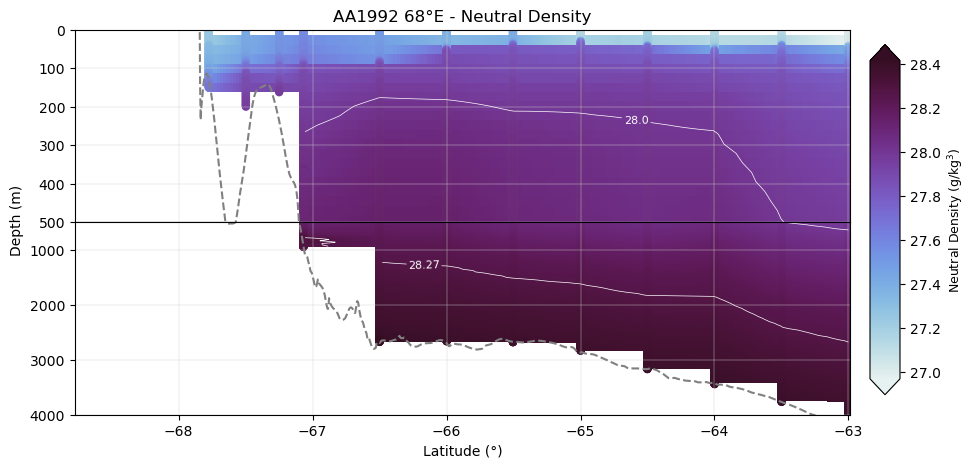

In [53]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.interpolate import griddata


# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))

# Prepare the grid of X, Z values for interpolation
X, Z = np.meshgrid(all_lat_float32, all_depth_float32)

# Define the grid points for interpolation
grid_lon = np.linspace(all_lat.min(), all_lat.max(), 200)
grid_depth = np.linspace(all_depth.min(), all_depth.max(), 200)
grid_X, grid_Z = np.meshgrid(grid_lon, grid_depth)

# Perform the interpolation using griddata
grid_cons_temp = griddata((all_lat, all_depth), all_cons_temp, (grid_X, grid_Z), method='linear')
grid_neu_dens = griddata((all_lat, all_depth), all_neu_dens, (grid_X, grid_Z), method='linear')
grid_abs_salt = griddata((all_lat, all_depth), all_abs_salt, (grid_X, grid_Z), method='linear')


# Open the NetCDF file with xarray
gebco = xr.open_dataset('bathymetry data/netCDF_CD_bathymetry/GEBCO_30_Apr_2023_950e3c1fe0d8/gebco_2022_n-63.0_s-68.5_w62.5_e72.0.nc', engine='netcdf4')
elevation = gebco.elevation.where(gebco.elevation < 0, np.nan)



# First subplot with y-axis range 0-500m
mesh1 = ax1.pcolormesh(grid_X, grid_Z, grid_neu_dens, cmap='cmo.dense')
#cont1 = ax1.contour(grid_X, grid_Z, grid_neu_dens, levels=10, colors='w', linewidths=0.5)
#cont1 = ax1.contour(grid_X, grid_Z, grid_neu_dens, levels=[27.2, 27.3, 27.4, 27.5, 27.6, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3], colors='w', linewidths=0.5)
cont1 = ax1.contour(grid_X, grid_Z, grid_neu_dens, levels=[28, 28.27], colors='w', linewidths=0.5)
# Overlay scatter/plot values
scat1 = ax1.scatter(all_lat, all_depth, c=all_neu_dens, cmap='cmo.dense', edgecolor = 'lightgray', linewidths=0.01)
ax1.clabel(cont1, inline=True, fontsize=8, fmt='%1.1f')
ax1.set_ylim(0, 500)
# ax1.set_title('IN2021 65°E - Neutral Density')
# ax1.set_title('IN2021 70°E - Neutral Density')
ax1.set_title('AA1992 68°E - Neutral Density')
ax1.invert_yaxis()
ax1.set_xticklabels([])
ax1.grid(linewidth=0.3, color='lightgray')
# Plot a line for seafloor depths on both subplots
ax1.plot(latitude_values, depth_values, color='gray', linestyle='--', label='Seafloor')


# Second subplot with y-axis range 500-3500m
mesh2 = ax2.pcolormesh(grid_X, grid_Z, grid_neu_dens, cmap='cmo.dense')
#cont2 = ax2.contour(grid_X, grid_Z, grid_neu_dens, levels=10, colors='w', linewidths=0.5)
#cont2 = ax2.contour(grid_X, grid_Z, grid_neu_dens, levels=[27.2, 27.3, 27.4, 27.5, 27.6, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3], colors='w', linewidths=0.5)
cont2 = ax2.contour(grid_X, grid_Z, grid_neu_dens, levels=[28, 28.27], colors='w', linewidths=0.5)
# Overlay scatter/plot values
scat2 = ax2.scatter(all_lat, all_depth, c=all_neu_dens, cmap='cmo.dense', edgecolor = 'lightgray', linewidths=0.001)
ax2.clabel(cont2, inline=True, fontsize=8, fmt='%1.2f')
ax2.set_ylim(500, 4000)
ax2.invert_yaxis()
ax2.set_xlabel('Latitude (°)', fontsize=10)
ax2.grid(linewidth=0.3, color='lightgray')
ax2.plot(latitude_values, depth_values, color='gray', linestyle='--', label='Seafloor')


# Create a single colorbar for both subplots
sm = cm.ScalarMappable(cmap='cmo.dense')
sm.set_array(grid_neu_dens)

# sm = cm.ScalarMappable(cmap='cmo.haline')
# sm.set_array(grid_abs_salt)




# Position the colorbar on the right side
cax = fig.add_axes([0.92, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cax, extend='both')
cbar.set_label('Neutral Density (g/kg$^3$)', fontsize=9)
#cbar.set_label('Absolute Salinity (g/kg)', fontsize=9)

# Add y-axis title between the subplots
fig.text(0.06, 0.5, 'Depth (m)', va='center', rotation='vertical', fontsize=10)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0)

# Show the plot
plt.show()